In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

from my_lib.plotting import plot_probability_distributions, plot_learning_curve, plot_validation_curve

In [2]:
data = pd.read_csv('data/titanic_newAge_withEncoded.csv')

In [6]:
mean_age = data[(data['NewAge']>0)]['NewAge'].mean()

def replace_age(age):
    return mean_age if age < 0 else age

data['NewAge'] = data['NewAge'].map(replace_age)

In [7]:
X = data.drop(columns=['Unnamed: 0', 'PassengerId', 'Survived'])
y = data['Survived']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [39]:
clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=1)
)

In [40]:
clf.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression(random_state=1))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(random_state=1),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 1,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

### GridSearchCV

In [41]:
parameters = {
    'logisticregression__C':[0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'logisticregression__class_weight': [None, 'balanced'],
    'logisticregression__fit_intercept': [True, False],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [42]:
gs = GridSearchCV(
    clf,
    param_grid=parameters,
    n_jobs=5,
    return_train_score=True
)

In [43]:
gs.fit(X_train, y_train)

/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  

/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  

/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  

/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  

/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  

/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  

/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=1))]),
             n_jobs=5,
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                         'logisticregression__class_weight': [None, 'balanced'],
                         'logisticregression__fit_intercept': [True, False],
                         'logisticregression__penalty': ['none', 'l1', 'l2',
                                                         'elasticnet'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear', 'sag',
                                                        'saga']},
             return_train_score=True)

In [44]:
gs.cv_results_

{'mean_fit_time': array([0.01724925, 0.01113224, 0.00523291, 0.01008458, 0.00916471,
        0.00390458, 0.00463924, 0.00600781, 0.00587811, 0.00750155,
        0.0101059 , 0.01014857, 0.00734525, 0.00894928, 0.00915785,
        0.00628185, 0.00617614, 0.00470448, 0.00429993, 0.00401168,
        0.01020427, 0.00747795, 0.00534687, 0.00963082, 0.00945706,
        0.00552411, 0.00536723, 0.00460596, 0.00469122, 0.00718031,
        0.0082325 , 0.00632443, 0.00458817, 0.00917902, 0.00941868,
        0.00469251, 0.00474668, 0.00363345, 0.00391622, 0.00464587,
        0.01733451, 0.01285839, 0.00531926, 0.00766296, 0.00971446,
        0.00597682, 0.00560699, 0.00744095, 0.00607252, 0.01005521,
        0.00934668, 0.01019573, 0.0060338 , 0.00716505, 0.00656223,
        0.00455065, 0.00490785, 0.00372643, 0.00464506, 0.00602245,
        0.0158217 , 0.01151218, 0.00578685, 0.01175475, 0.01011181,
        0.00562663, 0.00556321, 0.00719323, 0.00575995, 0.00898876,
        0.00849261, 0.00661263,

In [45]:
gs.best_score_

0.79322367773072

In [46]:
gs.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__class_weight': None,
 'logisticregression__fit_intercept': True,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

In [47]:
best_clf = gs.best_estimator_

In [48]:
best_clf.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression',
   LogisticRegression(C=0.1, penalty='l1', random_state=1, solver='liblinear'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(C=0.1, penalty='l1', random_state=1, solver='liblinear'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 0.1,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 1,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregressio

In [49]:
test_score = best_clf.score(X_test, y_test)
print('Score: {}'.format(test_score))

Score: 0.8539325842696629


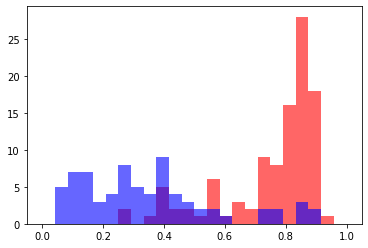

In [50]:
plot_probability_distributions(best_clf, X_test, y_test)

In [67]:
train_sizes, train_scores, test_scores = learning_curve(
    best_clf,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1, 10),
    cv=10
)

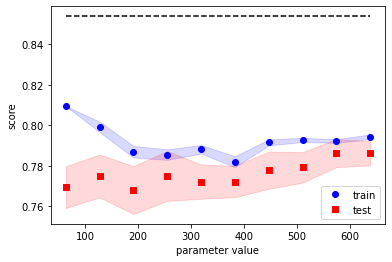

In [68]:
plot_learning_curve(train_scores, test_scores, train_sizes, expected_score=test_score)

In [69]:
y_pred = best_clf.predict(X_test)

In [70]:
X_test[(X_test['IsMale']==True)]

,SibSp,Parch,Fare,HasCabin,HasAge,NewAge,IsMale,EmbarkedQ,EmbarkedS,IsFirstClass,IsSecondClass,IsTicketNumber
770,0,0,7.8542,1,True,48.000000,1,0,1,0,0,1
682,5,2,46.9000,1,True,14.000000,1,0,1,0,0,0
531,1,1,7.2292,1,True,17.000000,1,0,0,0,0,1
6,0,0,51.8625,0,True,54.000000,1,0,1,1,0,1
17,0,0,13.0000,1,False,29.642093,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
498,0,0,7.7958,1,True,24.000000,1,0,1,0,0,1
730,0,0,18.7875,1,True,11.000000,1,0,0,0,0,1
372,0,0,135.6333,1,True,22.000000,1,0,0,1,0,0
587,0,0,8.0500,1,True,22.000000,1,0,1,0,0,1


In [64]:
best_clf.score(X_test[(X_test['IsMale']==False)], y_test[(X_test['IsMale']==False)])

0.8208955223880597